In [18]:
import pandas as pd
from pycaret.classification import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

df = pd.read_csv("final.csv")

cols_to_keep = ['jacket_number', 'age_at_arrest', 'hours', 'marital_status', 'employment_status',
    'city', 'race', 'sex', 'STATE', 'citizenship', 'occupation', 'school', 'prisoner_type', 'r', 'days_since', 'offense_level', 'previous_i', 'age_first', 'year']
categorical =  ['marital_status', 'employment_status', 'race', 'city', 'sex', 'STATE', 'citizenship', 'occupation', 'school', 'prisoner_type', 'offense_level', 'year']

predict_columns = ['age_at_arrest', 'age_at_release', 'hours', 'marital_status', 'employment_status',
    'city', 'race', 'sex', 'STATE', 'citizenship', 'occupation', 'school', 'prisoner_type']

new_df = df.loc[:, cols_to_keep]
new_df


,jacket_number,age_at_arrest,hours,marital_status,employment_status,city,race,sex,STATE,citizenship,occupation,school,prisoner_type,r,days_since,offense_level,previous_i,age_first,year
0,6265,72.0,14,Single,Retired,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,UNEMPLOYED,High School,Misdemeanor Arraignment,False,NaN,Misdemeanor,0,72.0,2013
1,6565,68.0,40,Single,Self Employed,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,SELF EMPLOYED,High School,Misdemeanor Arraignment,True,NaN,Misdemeanor,0,68.0,2012
2,6565,69.0,11,Single,Retired,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,SELF EMPLOYED,High School,OV Pre-Trial,True,521.0,Other,1,68.0,2013
3,6565,70.0,16,Single,Unemployed,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,SELF EMPLOYED,High School,OV Pre-Trial,True,316.0,Other,2,68.0,2014
4,6565,71.0,3,Single,Employed - Full Time,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,SELF EMPLOYED,High School,OV Pre-Trial,True,209.0,Other,3,68.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40252,1069761,54.0,0,Divorced,Unemployed,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,SALES,High School,Felony Other,False,NaN,Felony,0,54.0,2018
40253,1069763,18.0,0,Single,Unemployed,URBANA,Black,Female,ILLINOIS,UNITED STATES,FACTORY WORKER,High School,Misdemeanor Other,False,NaN,Misdemeanor,0,18.0,2018
40254,1069766,32.0,115,Married,Employed - Full Time,URBANA,Black,Female,ILLINOIS,UNITED STATES,FACTORY WORKER,High School,Misdemeanor Arraignment,False,NaN,Misdemeanor,0,32.0,2018
40255,1069768,31.0,9,Married,Employed - Full Time,CHAMPAIGN,Black,Male,ILLINOIS,BRAZIL,STUDENT,High School,Misdemeanor Pre-Trial,False,NaN,Misdemeanor,0,31.0,2018


In [19]:
s = setup(new_df, target='r', categorical_features=categorical)

,Description,Value
0,Session id,6907
1,Target,r
2,Target type,Binary
3,Original data shape,"(40257, 19)"
4,Transformed data shape,"(40257, 44)"
5,Transformed train set shape,"(28179, 44)"
6,Transformed test set shape,"(12078, 44)"
7,Numeric features,6
8,Categorical features,12
9,Rows with missing values,48.7%


In [20]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7210,0.0000,0.7411,0.7223,0.7315,0.4412,0.4414,0.5680
gbc,Gradient Boosting Classifier,0.7174,0.0000,0.7467,0.7151,0.7305,0.4338,0.4343,0.3760
rf,Random Forest Classifier,0.7058,0.0000,0.7213,0.7099,0.7155,0.4110,0.4112,0.2790
ada,Ada Boost Classifier,0.7057,0.0000,0.7349,0.7042,0.7192,0.4103,0.4107,0.1200
lda,Linear Discriminant Analysis,0.6928,0.0000,0.7495,0.6826,0.7145,0.3835,0.3855,0.0520
ridge,Ridge Classifier,0.6926,0.0000,0.7494,0.6824,0.7144,0.3831,0.3851,0.0450
et,Extra Trees Classifier,0.6787,0.0000,0.7002,0.6820,0.6909,0.3566,0.3568,0.2610
lr,Logistic Regression,0.6758,0.0000,0.7278,0.6691,0.6972,0.3496,0.3511,0.2370
qda,Quadratic Discriminant Analysis,0.6400,0.0000,0.7292,0.6523,0.6404,0.2772,0.2968,0.0470
dt,Decision Tree Classifier,0.6326,0.0000,0.6423,0.6419,0.6419,0.2647,0.2648,0.0620


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6907, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [21]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7090,0.0000,0.7453,0.7044,0.7243,0.4168,0.4175
1,0.7211,0.0000,0.7502,0.7184,0.7339,0.4411,0.4416
2,0.7268,0.0000,0.7564,0.7234,0.7395,0.4525,0.4530
3,0.7282,0.0000,0.7612,0.7232,0.7417,0.4552,0.4559
4,0.7165,0.0000,0.7462,0.7141,0.7298,0.4319,0.4323
5,0.7094,0.0000,0.7268,0.7125,0.7196,0.4180,0.4181
6,0.7044,0.0000,0.7372,0.7018,0.7191,0.4076,0.4081
7,0.7179,0.0000,0.7455,0.7163,0.7306,0.4348,0.4351
8,0.7200,0.0000,0.7545,0.7154,0.7344,0.4388,0.4395


In [22]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7087,0.0000,0.7308,0.7097,0.7201,0.4165,0.4167
1,0.7243,0.0000,0.7495,0.7230,0.7360,0.4477,0.4480
2,0.7246,0.0000,0.7529,0.7220,0.7371,0.4483,0.4487
3,0.7275,0.0000,0.7474,0.7283,0.7377,0.4542,0.4544
4,0.7204,0.0000,0.7448,0.7199,0.7322,0.4398,0.4401
5,0.7083,0.0000,0.7095,0.7185,0.7140,0.4164,0.4164
6,0.7058,0.0000,0.7344,0.7047,0.7193,0.4106,0.4109
7,0.7108,0.0000,0.7331,0.7119,0.7223,0.4207,0.4209
8,0.7221,0.0000,0.7400,0.7244,0.7321,0.4436,0.4437


Fitting 10 folds for each of 10 candidates, totalling 100 fits


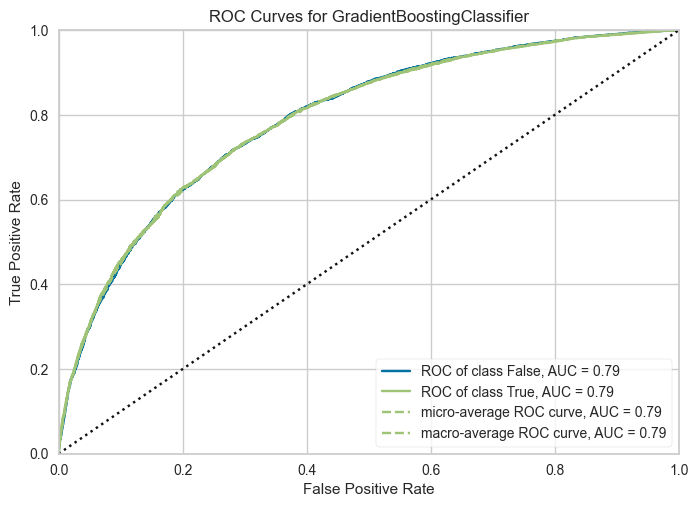

In [23]:
plot_model(tuned_gbc, plot = 'auc')

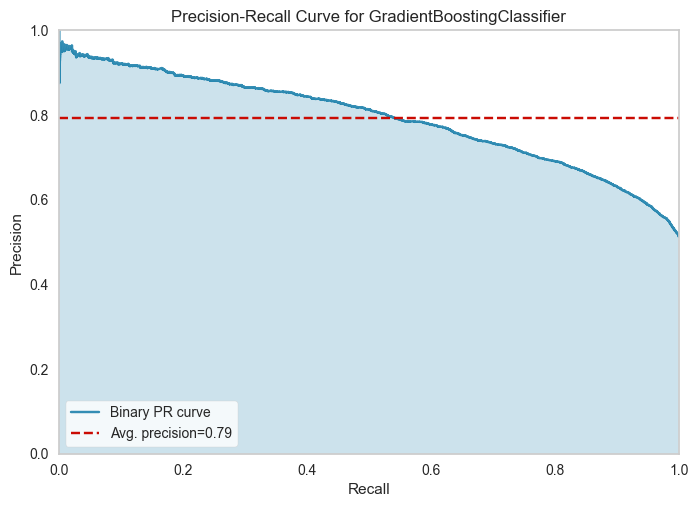

In [24]:
plot_model(tuned_gbc, plot = 'pr')

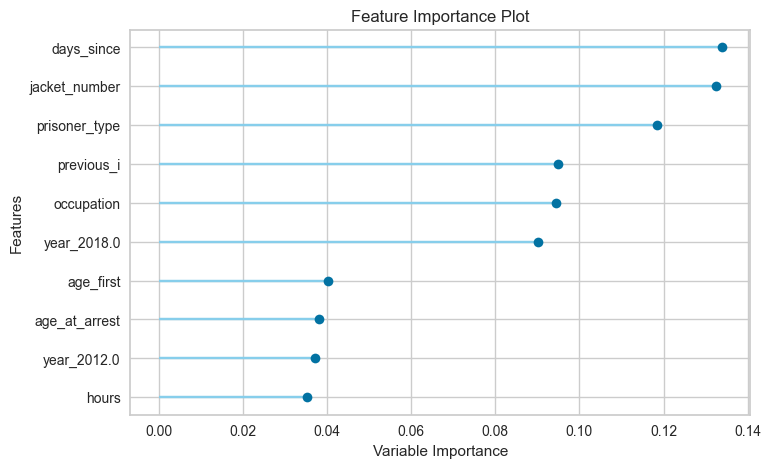

In [25]:
plot_model(tuned_gbc, plot='feature')

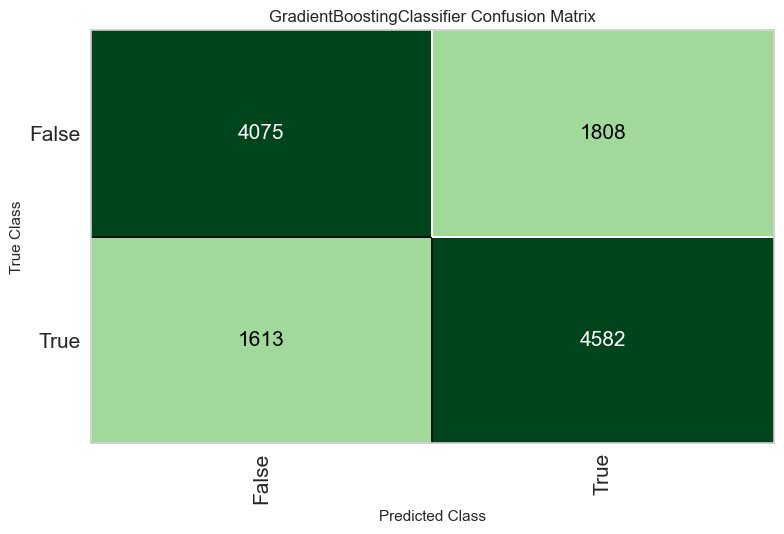

In [26]:
plot_model(tuned_gbc, plot = 'confusion_matrix')

In [28]:
final_gbc = finalize_model(tuned_gbc)
print(final_gbc)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['jacket_number', 'age_at_arrest',
                                             'hours', 'days_since',
                                             'previous_i', 'age_first'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 Trans...
                                            criterion='friedman_mse', init=None,
                  

In [29]:
predict_model(final_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7303,0.8138,0.7989,0.7110,0.7524,0.4584,0.4621


,jacket_number,age_at_arrest,hours,marital_status,employment_status,city,race,sex,STATE,citizenship,...,school,prisoner_type,days_since,offense_level,previous_i,age_first,year,r,prediction_label,prediction_score
29815,1041250,18.0,23,Single,Unemployed,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Misdemeanor Pre-Trial,30.0,Misdemeanor,2,18.0,2014,True,1,0.9023
36837,1062186,19.0,35,Single,Unemployed,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Felony Pre-Trial,114.0,Felony,2,19.0,2016,False,1,0.7647
11531,544933,25.0,1,Single,Employed - Full Time,URBANA,Black,Female,ILLINOIS,UNITED STATES,...,High School,Misdemeanor Pre-Trial,NaN,Misdemeanor,0,25.0,2014,True,0,0.5275
21466,1012617,22.0,29,Significant Other,Employed - Part Time,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Misdemeanor Pre-Trial,316.0,Misdemeanor,10,18.0,2016,True,1,0.8628
24501,1025882,22.0,4,Single,Student,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Misdemeanor Arraignment,NaN,Misdemeanor,0,22.0,2012,False,0,0.6140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29016,1039024,20.0,22,Single,Employed - Part Time,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Felony Pre-Trial,21.0,Felony,1,20.0,2013,False,1,0.6764
12769,763528,28.0,1,Married,Employed - Full Time,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Traffic Arraignment,NaN,Misdemeanor,0,28.0,2013,True,1,0.7702
11626,546116,27.0,1,Single,Unemployed,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Misdemeanor Arraignment,56.0,Misdemeanor,3,26.0,2013,True,1,0.9351
29572,1040589,25.0,6,Single,Employed - Full Time,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Traffic Pre-Trial,95.0,Felony,5,21.0,2017,True,1,0.5116


In [30]:
unseen_predictions = predict_model(final_gbc)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7303,0.8138,0.7989,0.7110,0.7524,0.4584,0.4621


,jacket_number,age_at_arrest,hours,marital_status,employment_status,city,race,sex,STATE,citizenship,...,school,prisoner_type,days_since,offense_level,previous_i,age_first,year,r,prediction_label,prediction_score
29815,1041250,18.0,23,Single,Unemployed,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Misdemeanor Pre-Trial,30.0,Misdemeanor,2,18.0,2014,True,1,0.9023
36837,1062186,19.0,35,Single,Unemployed,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Felony Pre-Trial,114.0,Felony,2,19.0,2016,False,1,0.7647
11531,544933,25.0,1,Single,Employed - Full Time,URBANA,Black,Female,ILLINOIS,UNITED STATES,...,High School,Misdemeanor Pre-Trial,NaN,Misdemeanor,0,25.0,2014,True,0,0.5275
21466,1012617,22.0,29,Significant Other,Employed - Part Time,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Misdemeanor Pre-Trial,316.0,Misdemeanor,10,18.0,2016,True,1,0.8628
24501,1025882,22.0,4,Single,Student,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Misdemeanor Arraignment,NaN,Misdemeanor,0,22.0,2012,False,0,0.6140


In [31]:
unseen_predictions['prediction'] = unseen_predictions['prediction_label'].map({0: False, 1: True})

# Compare similarity between 'r' and 'prediction_mapped'
similarity = (unseen_predictions['r'] == unseen_predictions['prediction']).mean()

print("Similarity between 'r' and 'prediction_mapped':", similarity)

Similarity between 'r' and 'prediction_mapped': 0.7302533532041728
